In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
mushrooms = pd.read_csv('training_mush.csv')
mushrooms.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [3]:
mushrooms.shape

(6093, 23)

# Task 1

Iterate through the parameters using GridSearchCV and train Random Forest on the data specified in the previous step. Pass the model to GridSearchCV specifying random_state

```Python
RandomForestClassifier(random_state=0)
```

Options to select -

- n_estimators: from 10 to 50 in increments of 10
- max_depth: from 1 to 12 in steps of 2
- min_samples_leaf: 1 to 7
- min_samples_split: from 2 to 9 in increments of 2
    
Specify cv=3. To speed up calculations in GridSearchCV, you can specify n_jobs=-1 to use all processors.

Which Random Forest parameters were selected as the best to solve on this data?

In [4]:
forest = RandomForestClassifier(random_state=0)

parameters = {
    'n_estimators': range(10, 50, 10),
    'max_depth': range(1, 12, 2),
    'min_samples_leaf': range(1, 7),
    'min_samples_split': range(2, 9, 2),
}

# n_jobs = -1 use full CPU power
grid_search = GridSearchCV(estimator=forest,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=3)

X = mushrooms.drop('class', axis=1)
y = mushrooms['class']
grid_search.fit(X, y)
print(grid_search.best_params_)

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


# Task 2

Select the correct statements about the importance of features for our classifier

In [5]:
# Plant best tree
forest = RandomForestClassifier(
    n_estimators=10,
    max_depth=9,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=0
)

In [6]:
# Display feature importances
forest.fit(X, y)
forest.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

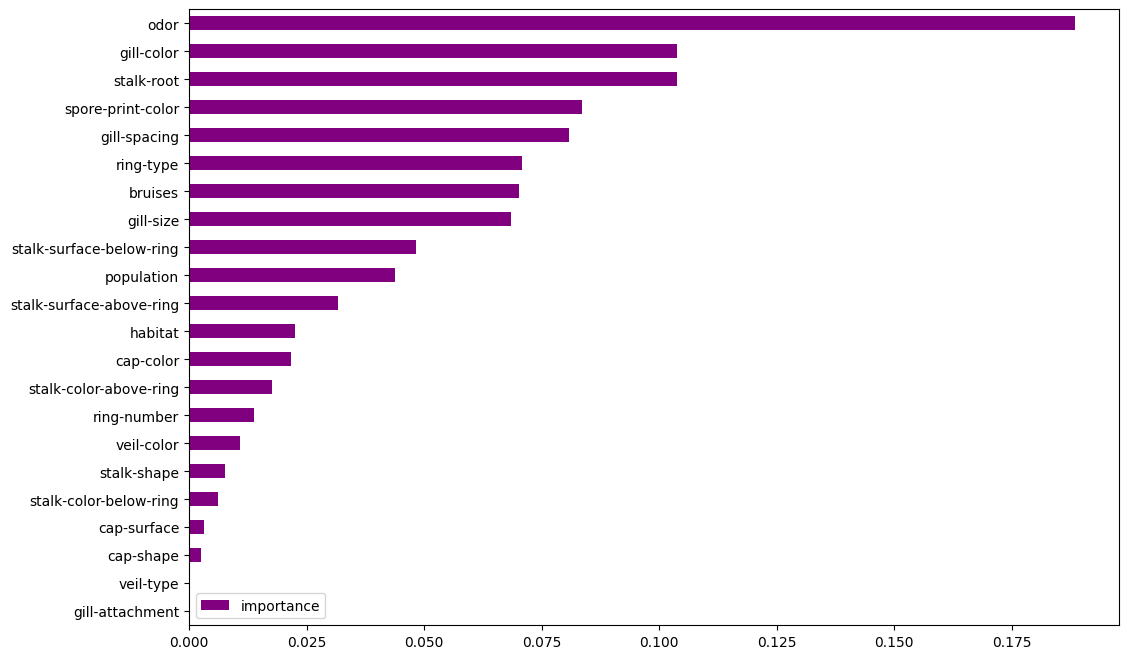

In [7]:
# Create feature importance hierarchy
importance = pd.DataFrame(data=forest.feature_importances_,
                         index=X.columns,
                         columns=['importance'])
importance.sort_values('importance').plot(kind='barh', color='purple', figsize=(12, 8));

# Task 3

Now we have a classifier that determines which mushrooms are edible and which are not, let's try it! Predict the edibility of these given mushrooms and write down the number of inedible mushrooms (class equal to 1).



Please note that in order to use this forest on new mushrooms, we will need to fill in the mushroom parameter values,
Some of which are easier to determine (for example, the color of the cap), but to determine some you will need a mycologist.
That is, in this case we will have to extract features from the object ourselves. For visual features such as shape and color, you can use a more complex model (for example, a convolutional neural network) and feed photos of a mushroom as input.
And the model itself will extract the features instead of describing them to us ourselves. But you can’t get away with just one photo - you’ll need another detector to determine the smell

In [8]:
mush_test = pd.read_csv('testing_mush.csv')
mush_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [9]:
mush_test.shape

(2031, 22)

In [10]:
y_pred = forest.predict(mush_test)
y_pred.sum()

976

**976** objects detected as class 1

# Task 4

Create a confusion matrix based on the predictions you received in the last lesson

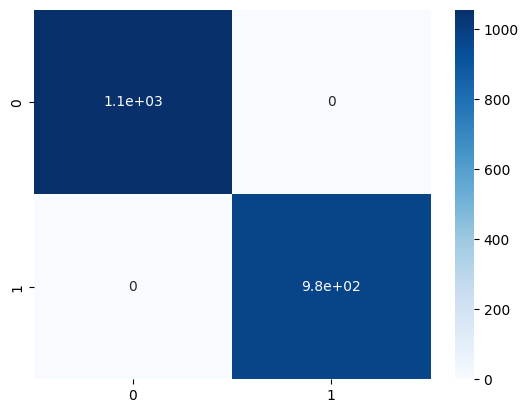

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = pd.read_csv('testing_y_mush.csv')
data = confusion_matrix(y_true, y_pred)
sns.heatmap(data, annot=True, cmap='Blues');

# Task 5

Let's move on to the next dataset.

The Earth is attacked by bugger troops, and their fleet includes transports, fighters and cruisers. To combat each type of ship, a different type of weapon is used. As an analyst from the Defense Headquarters, you are tasked with developing a model that predicts which ships are involved in an attack,
to successfully repel attacks on various areas of the planet

We managed to collect little data, and we will have to predict a much larger array.

Train the model and predict ship classes for new incoming data. Indicate in your answer, separated by a space, the number of cruisers, transports and fighters.
The fate of humanity depends on your answer!

In [12]:
invasion = pd.read_csv('invasion.csv')
invasion.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [13]:
X = invasion.drop('class', axis=1)
y = invasion['class']

In [14]:
invasion.shape

(500, 7)

In [15]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomForestClassifier(random_state=25)

parameters = {
    'n_estimators': range(1, 1000),
    'max_depth': range(3, 101),
    'min_samples_leaf': range(1, 101),
    'min_samples_split': range(2, 101, 2)
}

random_search = RandomizedSearchCV(estimator=random, param_distributions=parameters, n_jobs=-1, cv=5)
random_search.fit(X, y)
random_search.best_params_

{'n_estimators': 26,
 'min_samples_split': 70,
 'min_samples_leaf': 40,
 'max_depth': 44}

In [16]:
operative_information = pd.read_csv('operative_information.csv')
operative_information.shape

(1500, 6)

Test data has in 3 times more observations!

In [17]:
y_pred = random_search.predict(operative_information)
pd.Series(data=y_pred).value_counts()

fighter      675
transport    595
cruiser      230
Name: count, dtype: int64

# Task 6

Which variable was found to be most important in classifying ships?

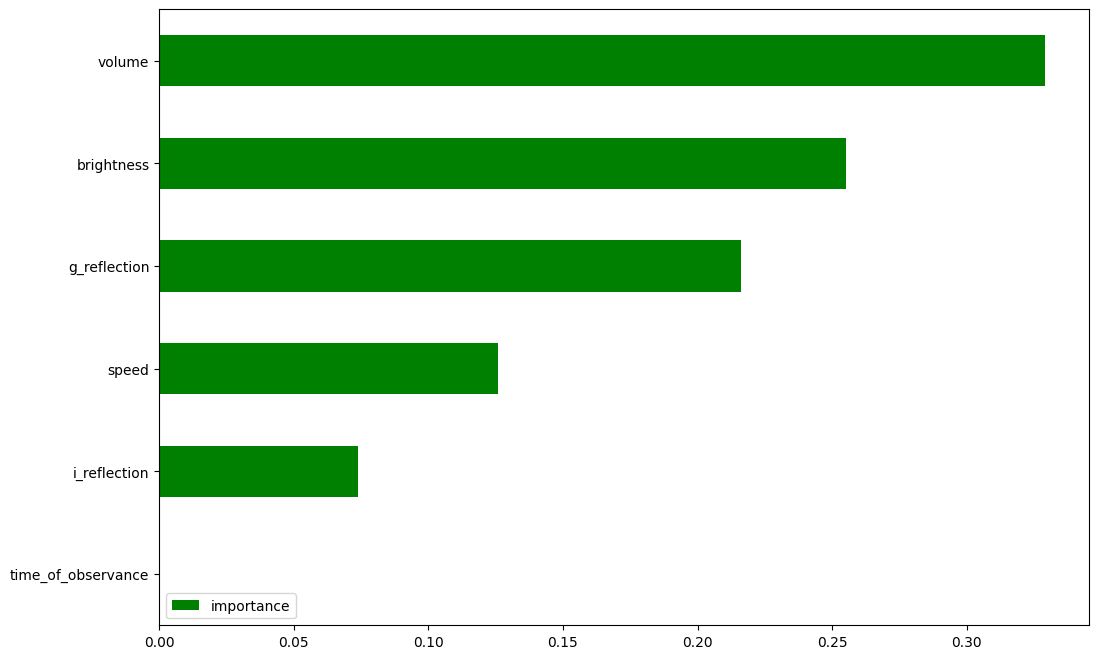

In [18]:
# Create Random Forest with best parameters
best_forest = RandomForestClassifier(
    n_estimators=278,
    min_samples_split=36,
    min_samples_leaf=2,
    max_depth=71,
    random_state=25
)
    
best_forest.fit(X, y)
importance = best_forest.feature_importances_

pd.DataFrame(data=importance, index=X.columns, columns=['importance']) \
    .sort_values(ascending=True, by='importance') \
    .plot(kind='barh', figsize=(12, 8), color='green');

**Volume** is the most important feature in this situation

# Task 7

Thanks to your efforts, the invading troops were defeated, but the war is not over yet! You have been promoted and transferred to a new direction (new positions - new tasks) - now you need to identify dangerous regions of space where bugs may be located.

Analyze available data on the dangers of different regions of space and indicate the most likely causes of the threat

In [19]:
space = pd.read_csv('space_can_be_a_dangerous_place.csv')
print(space.shape)
space.head()

(100000, 8)


,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


Target feature is **dangerous**

In [20]:
space.dangerous.value_counts()

dangerous
1    90202
0     9798
Name: count, dtype: int64

In [21]:
# Leave only dangerous situations
danger = space[space.dangerous == 1]
danger.dangerous.value_counts()

dangerous
1    90202
Name: count, dtype: int64

In [22]:
# Leave only not dangerous situations
not_danger = space[space.dangerous == 0]
not_danger.dangerous.value_counts()

dangerous
0    9798
Name: count, dtype: int64

In [23]:
for reason in ['black_hole_is_near', 'buggers_were_noticed', 'nearby_system_has_planemo']:
    print(danger[reason].value_counts())
    print()

black_hole_is_near
0    79788
1    10414
Name: count, dtype: int64

buggers_were_noticed
1    86500
0     3702
Name: count, dtype: int64

nearby_system_has_planemo
1    90202
Name: count, dtype: int64



In [24]:
for reason in ['black_hole_is_near', 'buggers_were_noticed', 'nearby_system_has_planemo']:
    print(not_danger[reason].value_counts())
    print()

black_hole_is_near
0    9213
1     585
Name: count, dtype: int64

buggers_were_noticed
1    6499
0    3299
Name: count, dtype: int64

nearby_system_has_planemo
1    8833
0     965
Name: count, dtype: int64



In [25]:
# Figure out best parameters for Random Forest
X = space.drop('dangerous', axis=1)
y = space['dangerous']

model = RandomForestClassifier(random_state=25)

parameters = {
    'n_estimators': range(1, 100, 5),
    'max_depth': range(3, 21, 2),
    'min_samples_leaf': range(1, 51, 2),
    'min_samples_split': range(2, 101, 2)
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=parameters,
    n_jobs=-1,
    cv=5
)

random_search.fit(X, y)
random_search.best_params_

{'n_estimators': 74,
 'min_samples_split': 14,
 'min_samples_leaf': 92,
 'max_depth': 4}

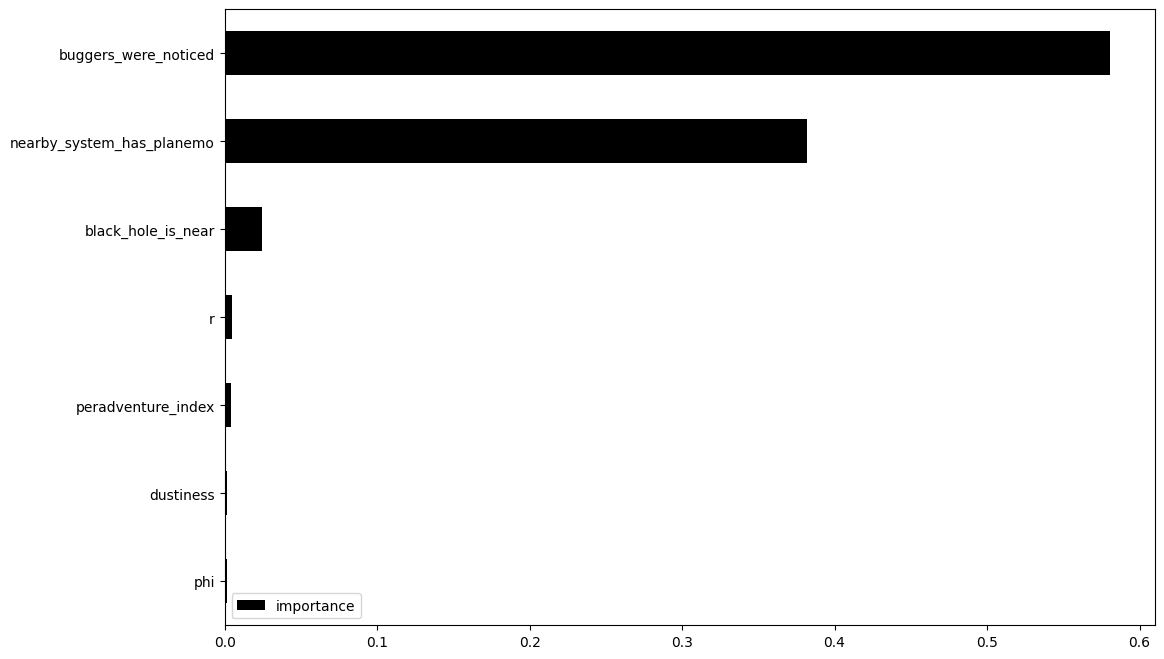

In [27]:
# Create Random Forest with best parameters
best_forest = RandomForestClassifier(
    n_estimators=74,
    min_samples_split=14,
    min_samples_leaf=92,
    max_depth=4,
    random_state=25
)
    
best_forest.fit(X, y)
importance = best_forest.feature_importances_

pd.DataFrame(data=importance, index=X.columns, columns=['importance']) \
    .sort_values(ascending=True, by='importance') \
    .plot(kind='barh', figsize=(12, 8), color='black');

The **presence of bugs** in the system is an obvious signal of danger

The **presence of a planemo** increases the danger - perhaps the bugs are building their bases on these bodies